In [1]:
import jax.numpy as np
import numpy as onp
from jax import random, grad, jit, vmap
from functools import partial
key = random.PRNGKey(8)
#from jax.experimental import optimizers
#import optax # optax.adam instead of optimizers.adam
from jax.example_libraries import optimizers
from NODE_ICNN_CANN_MF_fns import icnn_forwardpass, init_params_icnn
import matplotlib.pyplot as plt
import pickle
from jax.config import config
import pandas as pd
config.update("jax_enable_x64", True)
plt.rcParams.update({'font.size': 12})


In [2]:
def myloss(params, x):
    y_gt = (x-2.0)**2-1.0
    y_gt = y_gt[:,0]

    f1 = lambda x: icnn_forwardpass(x, params)[0]
    icnn_vmap = vmap(f1)
    y_pr = icnn_vmap(x)
    return np.mean((y_gt-y_pr)**2)

@partial(jit, static_argnums=(0,))
def step_jp(loss, i, opt_state, X_batch):
    params = get_params(opt_state)
    g = grad(loss)(params, X_batch)
    return opt_update(i, g, opt_state)

def train_jp(loss, X, opt_state, key, nIter = 10000, print_freq = 1000):
    train_loss = []
    val_loss = []
    for it in range(nIter):
        opt_state = step_jp(loss, it, opt_state, X)         
        if (it+1)% print_freq == 0:
            params = get_params(opt_state)
            train_loss_value = loss(params, X)
            train_loss.append(train_loss_value)
            to_print = "it %i, train loss = %e" % (it+1, train_loss_value)
            print(to_print)
    return get_params(opt_state), train_loss, val_loss

In [3]:
x = np.expand_dims(np.linspace(0,10), axis=1)
layers = [1,2,2,1]
params = init_params_icnn(layers, key)
opt_init, opt_update, get_params = optimizers.adam(1.e-3)
opt_state = opt_init(params)

params, train_loss, val_loss = train_jp(myloss, x, opt_state, key, nIter = 100000, print_freq=10000)

it 10000, train loss = 1.920448e+00
it 20000, train loss = 5.328154e-01
it 30000, train loss = 5.071532e-01
it 40000, train loss = 5.036856e-01
it 50000, train loss = 5.021877e-01
it 60000, train loss = 5.012990e-01
it 70000, train loss = 5.006946e-01
it 80000, train loss = 5.002561e-01
it 90000, train loss = 4.999219e-01
it 100000, train loss = 4.996579e-01


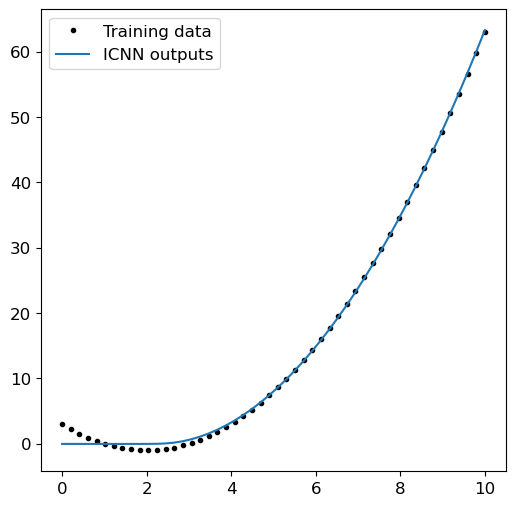

In [4]:
y_gt = (x-2.0)**2-1.0

f1 = lambda x: icnn_forwardpass(x, params)[0]
icnn_vmap = vmap(f1)
y_pr = icnn_vmap(x)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y_gt,'k.', label='Training data')
ax.plot(x,y_pr, label='ICNN outputs')
ax.legend()

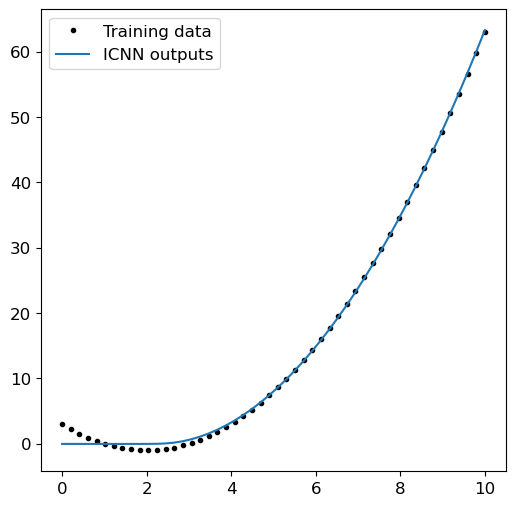

In [5]:
y_gt = (x-2.0)**2-1.0

f1 = lambda x: icnn_forwardpass(x, params)[0]
icnn_vmap = vmap(f1)
y_pr = icnn_vmap(x)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y_gt,'k.', label='Training data')
ax.plot(x,y_pr, label='ICNN outputs')
ax.legend()

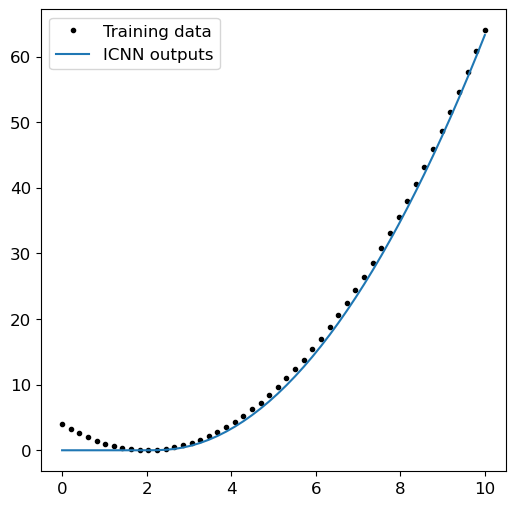

In [6]:
y_gt = (x-2.0)**2

f1 = lambda x: icnn_forwardpass(x, params)[0]
icnn_vmap = vmap(f1)
y_pr = icnn_vmap(x)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y_gt,'k.', label='Training data')
ax.plot(x,y_pr, label='ICNN outputs')
ax.legend()